## PDEBench

Paper https://arxiv.org/pdf/2210.07182.pdf

Config: https://github.com/pdebench/PDEBench/blob/main/pdebench/models/config/args/config_3DCFD.yaml

In [22]:
import h5py
import os 
from pathlib import Path


# list all files in directory
DATA_DIR = Path("/datasets/pdebench/3D/Train/")
print(os.listdir(DATA_DIR))

['3D_CFD_Rand_M1.0_Eta1e-08_Zeta1e-08_periodic_Train.hdf5', '3D_CFD_Turb_M1.0_Eta1e-08_Zeta1e-08_periodic_Train.hdf5']


In [23]:
# Load file

FILE = DATA_DIR / "3D_CFD_Turb_M1.0_Eta1e-08_Zeta1e-08_periodic_Train.hdf5"
print(f"Loading {FILE} ...")

f = h5py.File(FILE, "r")

# Get the keys of the HDF5 file
print(f"Keys: {list(f.keys())}")

for key in f.keys():
    print(f"Key: {key}")
    print(f"Shape: {f[key].shape}")
    print(f"Data type: {f[key].dtype}")

Loading /datasets/pdebench/3D/Train/3D_CFD_Turb_M1.0_Eta1e-08_Zeta1e-08_periodic_Train.hdf5 ...
Keys: ['Vx', 'Vy', 'Vz', 'density', 'pressure', 't-coordinate', 'x-coordinate', 'y-coordinate', 'z-coordinate']
Key: Vx
Shape: (600, 21, 64, 64, 64)
Data type: float32
Key: Vy
Shape: (600, 21, 64, 64, 64)
Data type: float32
Key: Vz
Shape: (600, 21, 64, 64, 64)
Data type: float32
Key: density
Shape: (600, 21, 64, 64, 64)
Data type: float32
Key: pressure
Shape: (600, 21, 64, 64, 64)
Data type: float32
Key: t-coordinate
Shape: (22,)
Data type: float32
Key: x-coordinate
Shape: (64,)
Data type: float32
Key: y-coordinate
Shape: (64,)
Data type: float32
Key: z-coordinate
Shape: (64,)
Data type: float32


## Plotting

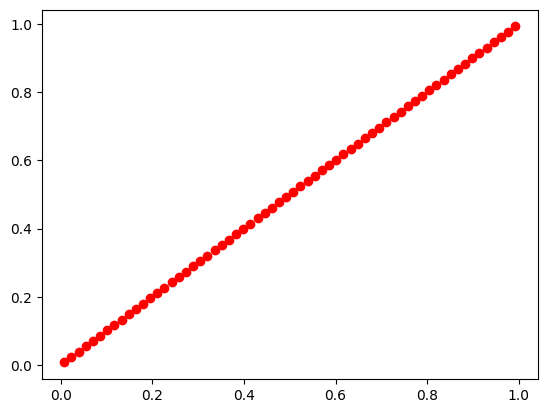

In [24]:
# Read x coodinate from file
import matplotlib.pyplot as plt

# f["x-coordinate"][3]

# plot coordinates
plt.plot(f["x-coordinate"][:], f["y-coordinate"][:], 'ro')

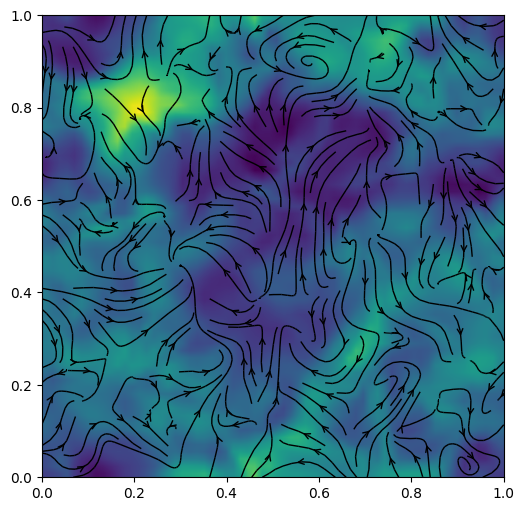

In [47]:
import numpy as np

DATA_IDX = 0
TIME_IDX = -1
Z_IDX = 32
f.keys()

vx = f['Vx'][DATA_IDX, TIME_IDX, :, :, 32]
vy = f['Vy'][DATA_IDX, TIME_IDX, :, :, 32]
pressure = f['pressure'][DATA_IDX, TIME_IDX, :, :, 32]
density = f['density'][DATA_IDX, TIME_IDX, :, :, 32]

# vz = f['Vz'][DATA_IDX, TIME_IDX, :, :, :]

x = np.linspace(0, 1, f["x-coordinate"].shape[0])
y = np.linspace(0, 1, f["y-coordinate"].shape[0])
z = np.linspace(0, 1, f["z-coordinate"].shape[0])


# Plot 2D velocity field
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)
ax.streamplot(x, y, vx, vy, density=1.5, color='k', linewidth=1, arrowsize=1, arrowstyle='->')

# Plot pressure
ax.imshow(density, cmap='viridis', extent=[0, 1, 0, 1], alpha=1, interpolation='bilinear')